In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# #Load the metadata
# # path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# # path="/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv"
# # path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
# # path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_clear_all_erp.csv"
# Metadata=pd.read_csv(path)
# Metadata.head(2)

In [3]:
##Load the metadata
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_noise_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50Tr10msnoise_all_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_noise_all_erp.csv"
path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_noise_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/125sam_10ms_noise_all_erp.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,label,0,1,2,3,4,5,6,7,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,0,0.0,4.270001e-10,1.756739e-10,-1.582226e-10,-1.382528e-10,-1.566167e-10,-1.135809e-10,-1.100892e-10,-1.589276e-10,...,1.110038e-10,1.152507e-10,-2.399226e-10,3.433448e-10,2.240594e-10,3.181698e-10,-1.644904e-10,1.001664e-10,-5.799119e-11,-4.880700e-10
1,1,0.0,5.456352e-10,2.865467e-10,-2.532695e-10,-2.100140e-10,-2.099953e-10,-5.603980e-12,-2.883015e-10,1.572863e-11,...,8.383168e-11,2.517060e-10,-8.620627e-11,2.037169e-10,2.261165e-10,3.166203e-10,-7.354289e-11,-5.902324e-11,-4.279494e-11,-3.508126e-10


In [4]:
X=Metadata.iloc[:,2:]
y=Metadata['label']
X.shape,y.shape

((1804, 1428), (1804,))

# Apply SVM on Data

In [5]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [6]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(1804, 1428) (1804,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


In [7]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train,y_train)
print 'Finish tuning'      

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  3.7min finished


Finish tuning


In [8]:
y_p = clf_Tune.best_estimator_.predict(X_test)
ACC=classification_report(y_test, y_p)
print ACC
ACC_AVG=accuracy_score(y_test, y_p)
print ACC_AVG
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
AUC_Th2_T=metrics.auc(fpr, tpr)
print AUC_Th2_T

             precision    recall  f1-score   support

          0       0.88      0.91      0.89       149
          1       0.93      0.92      0.92       212

avg / total       0.91      0.91      0.91       361

0.9113573407202216
0.9105673040395086


In [9]:
y_p=clf_Tune.best_estimator_.predict(X_test)
print "Accuracy:", clf_Tune.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf_Tune.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9113573407202216
support: 75.6063756064


In [10]:
# print 'Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_)
clf_Tune.best_params_
# clf_Tune.best_estimator_

{'C': 10.0, 'gamma': 0.00069}

In [11]:
# # Utility function to move the midpoint of a colormap to be around
# # the values of interest.
# from matplotlib.colors import Normalize
# class MidpointNormalize(Normalize):

#     def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
#         self.midpoint = midpoint
#         Normalize.__init__(self, vmin, vmax, clip)

#     def __call__(self, value, clip=None):
#         x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
#         return np.ma.masked_array(np.interp(value, x, y))
    
# scores = clf_Tune.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
# #print scores.shape,len(C_range),len(gamma_range)
# plt.figure(figsize=(8, 6))
# #plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
# plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
# plt.xlabel('gamma')
# plt.ylabel('C')
# plt.colorbar()
# plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
# plt.yticks(np.arange(len(C_range)), C_range)
# plt.title('Validation accuracy={}, best {}' .format(clf_Tune.best_score_,clf_Tune.best_params_))

# #filename='ParameterTuning'
# #save_format='png'
# #print filename+'.'+save_format
# #pp='home/ralfahad/Pictures'
# #plt.savefig(filename+'.'+save_format,dpi=100)
# #plt.show()

# Find Significant correlation with stability selections 

### Make the dataset

In [12]:
# Pre Processing 
X[0,:10]

array([ 0.67814456,  0.15669646, -0.30946844, -0.22098055, -0.67369314,
       -0.48778411,  0.07977262, -1.51255317, -0.17331251, -0.14478503])

In [13]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(1804, 1428) (1804, 1)


In [14]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [15]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [16]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
lars_cv.alphas_

array([0.00284981])

In [17]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas, random_state=42,max_iter=1000).fit(X, y)

[0.00284981 0.00256483 0.00227985 0.00199487 0.00170988 0.0014249
 0.00113992 0.00085494 0.00056996 0.00028498]


In [18]:
clf.scores_

array([0.01 , 0.035, 0.   , ..., 0.005, 0.   , 0.   ])

In [19]:
# # Rank the Features according to the importance
# names=range(0,1428) # Feature names used as 1-1428 features
# cn=np.asarray(names) # converted as numpy.ndarray
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# bb=np.asarray(b)
# rakfe=bb[bb[:,0]>0.34]
# ROIs=rakfe[:,1]%68

In [20]:
# # print "Features sorted by their score:"
# b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), 
#                  cn), reverse=True)

In [21]:
# bb=np.asarray(b)
# # rf=np.where(bb[:,0]>0.7)
# # ifea=np.squeeze(np.asarray(np.where(clf.scores_>=0.815)))
# ra=bb[bb[:,0]>0.50]
# # r=bb[e]
# ra[:,1]%68

In [22]:
# ind=np.where(clf.scores_>=0.710)
# ind

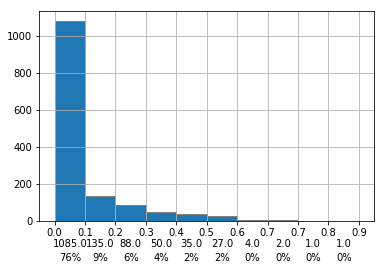

In [23]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [24]:
bins

array([0.    , 0.0935, 0.187 , 0.2805, 0.374 , 0.4675, 0.561 , 0.6545,
       0.748 , 0.8415, 0.935 ])

In [25]:
Th_2_Bins_Index= np.where((bins<=1.0) & (bins>=0.1)) # take the bins within a range
# print Th_2_Bins_Index
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.     0.0935 0.187  0.2805 0.374  0.4675 0.561  0.6545 0.748  0.8415
 0.935 ]
[0.187  0.2805 0.374  0.4675 0.561  0.6545 0.748  0.8415 0.935 ]


In [26]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(1804, 1428) (1804, 1)
(1443, 1428) (361, 1428) (1443, 1) (361, 1)


In [27]:
X_train[:,1:4]

array([[-0.91413668,  1.39751235,  1.31344481],
       [ 0.40705038,  0.33246288,  0.38360015],
       [ 0.40084665,  0.59585542,  0.31395024],
       ...,
       [-0.71030798,  0.08688194,  0.61198886],
       [ 0.64167564,  0.25948772,  0.12031974],
       [ 0.42179707,  0.66476974,  1.0388118 ]])

In [28]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [ ]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.5s


In [ ]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print accuracy_score(y_test, y_p)

In [ ]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
#gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'
        print clf_Tune.best_estimator_

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print SVe
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

In [ ]:
# accuracy_score(y_test, y_p)
# MulticlassAuc(y_test,y_p)

In [ ]:
        
#         ACC_Th2_T=accuracy_score(y_test, y_p)
#         AUC_Th2_T=MulticlassAuc(y_test,y_p)
#         print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
#         print 'ACC',ACC_Th2_T,AUC_Th2_T
#         ACC_Th2.append(ACC_Th2_T)
#         AUC_Th2.append(AUC_Th2_T)
#         Bins.append(i)
#     except:
#         print 'error at:',i
#     # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
#     # roc_auc_T = auc(false_positive_rate, true_positive_rate)
#     # print 'AUC',roc_auc_T
#     # AUC_Th2.append(roc_auc_T)

In [ ]:
ACC_Th2 
# Th_2_Bins1=range(1,8,1)
# Th_2_Bins1=np.array(Th_2_Bins1)*.1
# Th_2_Bins1

In [ ]:
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
# Th_2_Bins=Th_2_Bins1
data=clf.scores_
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,10,facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed' )#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red')
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.2f" % j),xy=(i,j-0.01), color ='red') ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")


    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black')






for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.2f" % j),xy=(i,j+0.01), color='black')##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black")
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')


    
    
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)


#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=0.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency')
ax.yaxis.label.set_color('Blue')
plt.title("Clear")
plt.tight_layout()
# #Save the image

filename='Corr_StabilitySelection_TH2'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
Th_2_Bins1=range(1,8,1)
Th_2_Bins1=np.array(Th_2_Bins1)*.1
Th_2_Bins=Th_2_Bins1

In [ ]:
# for i,j in zip(Th_2_Bins,AUC_Th2):
#     print i,j
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
NumberofElement=[]
for i,j,k,l in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.2f}".format(i))
    All_ACC.append("{0:.2f}".format(j))
    All_AUC.append("{0:.2f}".format(k))
    All_SV.append("{0:.2f}".format(l))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle']
Selected_Feature_Result

In [ ]:
Th_2_Bins[4]

In [ ]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[4])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

In [ ]:
ROI=fealoc%68
ROI
np.unique(ROI,return_counts=True)

In [ ]:
len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

In [ ]:
for th in Th_2_Bins:
    clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
    print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
    print 'Finish tuning'
    print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# use tuned parameter on to get model
#y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

In [ ]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [ ]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

In [ ]:
# Rank the Features according to the importance
names=range(0,1428) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[4]]
# rakfe=bb[bb[:,0]>=.4]
ROIs=rakfe[:,1]%68
print len(ROIs)

In [ ]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [ ]:
ROI
print np.unique(ROI,return_counts=True)
print len(np.unique(ROIs))

In [ ]:
ROIs[0]

In [ ]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [ ]:
nor=35
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [ ]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print dk.head(nor)
len(dk.head(nor))

In [ ]:
# aa=pd.DataFrame(dk.values[0:nor])
# aa.columns=['ROIs']
# ab=aa.drop_duplicates()
# Toprois=pd.DataFrame(ab.values)
# print Toprois

In [ ]:
# rois1=bb[0:16,1]%68
# pd.DataFrame(bb[0:16,0],shdkroi[rois1])

In [ ]:
# saa=pd.DataFrame(sdk.values[0:nor])
# saa.columns=['short ROIs']
# sab=saa.drop_duplicates()
# sToprois=pd.DataFrame(sab.values)
# # print sToprois

In [ ]:
# nor1=14
# sc=pd.DataFrame(bb[0:nor1,0])
# sn=pd.concat([Toprois,sToprois,sc],axis=1)
# sn.columns=['Fullname','ROIs short name', 'Feature score'] # sn: score and roi
# # ddd=pd.DataFrame(bb[0:16,0],sToprois)
# sn

In [ ]:
# sn.to_csv('Top15fea.csv')
# Th_2_Bins

In [ ]:
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [ ]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [ ]:
nor1=24
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

In [ ]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

In [ ]:
# alluR.to_csv('Top14.csv')

In [ ]:
# alluR

In [ ]:
len(clf.scores_)

# AllROIs_stability selection_score

In [ ]:
g=clf.scores_
allROIs=range(0,68)
x=[];
for i in allROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[[0,1,2,3,4,16],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear_all")
# plt.legend(leg)
plt.show()

In [ ]:
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[[0,1,2,3,4,16],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.show()

# Top score selected ROIs

In [ ]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
# yu=hh.values[[0,1,2,3,4],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
# plt.legend(leg)
plt.show()

In [ ]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
yu=hh.values[[0,1,2,3,4],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(0,1)
# plt.ylim(0.5,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
plt.legend(leg)
plt.show()

In [ ]:
leg=['rTP','rFUS', 'rPRC','lPRC','lSP']
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x)  
t=np.linspace(0,200,21)
yu=hh.values
# yu=hh.values[0:9,:]
yu=hh.values[[0,1,2],:]
plt.plot(t,yu.T)
plt.xlim(0, 200)
plt.ylim(top=1)
# plt.ylim(0.50,1)
plt.grid(True)
plt.ylabel("Stability scores")
plt.xlabel("Epoch time (ms)")
plt.title("Clear")
plt.legend(leg)
plt.show()

In [ ]:
ROIs=range(0,68)
x=[];
for i in ROIs:
#     print i
    r=np.arange(i,1428,68)
    l=np.int_(r)
#     ll=g[r]
    ll=g[l]
    x.append(ll)
hh=pd.DataFrame(x) 

In [ ]:
yu[1,:]

In [ ]:
aa=Selected_Feature_Result
ax.plot(aa.iloc[:,0],aa.iloc[:,2])
# plt.plot(aa.iloc[:,0],aa.iloc[:,1],'-r')
# plt.ylim([0.0,1.05])
plt.show()

In [ ]:
aa